In [75]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


## Solution

We use Monte Carlo RL to solve the Problem Statement

In [76]:
gamma = 1.0
actions = array([[-1,0],[0,-1],[1,0],[0,1]])
end_state = array([[0,0],[3,3]])
n_games = 10000

In [77]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [78]:
'''
Policy map creation and states initialisation
'''
p_map = np.zeros((4,4))
returns = {}
states = []
for i in range (0,4):
    for j in range (0,4):
        states.append([i,j])
returns = {(i, j):list() for i in range(0,4) for j in range(0,4)}
print(states)
print(returns)



[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]
{(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): []}


In [79]:
%%time
import random
from IPython.display import clear_output
decay = {(i, j):list() for i in range(0,4) for j in range(0,4)}
gamma = 0.6
for j in range(0,n_games+1):
    g = 0
    episode = []
    done = False
    init_state = random.choice([[1,0],[1,1],[1,2],[1,3],[0,1],[0,2],[0,3],[2,0],[2,1],[2,2],[2,3],[3,0],[3,1],[3,2]])#Chose an initial state
    while not done:
        reward = 0
        if init_state == [0,0] or init_state == [3,3]:
            done = True
            reward = 0
        action = random.choice(actions)
        final_state = [0,0]
        if action[0] + init_state[0] <=3 and action[0] + init_state[0] >=0 and action[1] + init_state[1] <=3 and action[1] + init_state[1] >=0 and done == False:
            final_state[0] = init_state[0] + action[0]
            final_state[1] = init_state[1] + action[1]
            reward = -1
        else:
            final_state = init_state
        if done == False:
            episode.append([init_state , action , reward , final_state])
            #print(init_state,'->',final_state,'..',action)
        init_state = final_state
    for i in enumerate(episode[::-1]):
        g = gamma*g + i[1][2]
        if i[1][0] not in [x[0] for x in episode[::-1][len(episode)-i[0]:]]:
            returns[(i[1][0][0] , i[1][0][1])].append(g)
            decay[(i[1][0][0] , i[1][0][1])].append(p_map[i[1][0][0] , i[1][0][1]] - np.average(returns[(i[1][0][0] , i[1][0][1])]))
            p_map[i[1][0][0] , i[1][0][1]] = np.average(returns[(i[1][0][0] , i[1][0][1])])
            
    
       
        

Wall time: 11.9 s


In [80]:
print(p_map)

[[ 0.         -1.31855445 -1.7604573  -1.54165458]
 [-1.32380655 -1.9547012  -2.10508762 -1.74463502]
 [-1.75476359 -2.11630769 -1.94551222 -1.30151672]
 [-1.55749754 -1.74969244 -1.32869514  0.        ]]


## Optimal Solution

The above matrix provides the optimal solution to the problem.

Now we plot the discount factor for gamma = 1

In [81]:
#Print decay
decay_rate = []
for x in decay.values():
    decay_rate.append(list(x)[:100])

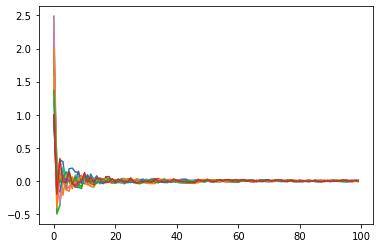

In [82]:
for i in decay_rate:
    if len(i)!=0:
        plt.plot(i)